In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
train = pd.read_csv('dataset/train.csv')
test= pd.read_csv('dataset/test.csv')
train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [98]:
train.dtypes

tracking_id                        object
datetime                           object
wind_speed(m/s)                   float64
atmospheric_temperature(°C)       float64
shaft_temperature(°C)             float64
blades_angle(°)                   float64
gearbox_temperature(°C)           float64
engine_temperature(°C)            float64
motor_torque(N-m)                 float64
generator_temperature(°C)         float64
atmospheric_pressure(Pascal)      float64
area_temperature(°C)              float64
windmill_body_temperature(°C)     float64
wind_direction(°)                 float64
resistance(ohm)                   float64
rotor_torque(N-m)                 float64
turbine_status                     object
cloud_level                        object
blade_length(m)                   float64
blade_breadth(m)                  float64
windmill_height(m)                float64
windmill_generated_power(kW/h)    float64
dtype: object

# Deal with NaN Values:

In [99]:
train.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

### Categorical Features

In [100]:
# Function to impute most occured category and add importance vairable
def impute_categorical(DataFrame,ColName):
    #1. add new column and replace if category is null then 1 else 0
    DataFrame[ColName+"_Imputed"] =   np.where(DataFrame[ColName].isnull(),1,0)
    
    # 2. Take most occured category in that vairable (.mode())
    Mode_Category = DataFrame[ColName].mode()[0]
    
    ## 2.1 Replace NAN values with most occured category in actual vairable
    DataFrame[ColName].fillna(Mode_Category,inplace=True)

In [101]:
for c in ['turbine_status','cloud_level']:
    impute_categorical(train, c)
    
# train[['turbine_status','turbine_status_Imputed','cloud_level','cloud_level_Imputed']].head(10)

### Numerical

In [102]:
train.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)',
       'windmill_generated_power(kW/h)', 'turbine_status_Imputed',
       'cloud_level_Imputed'],
      dtype='object')

In [103]:
import datawig

def impute_any(output_column):
    df_train, df_test = datawig.utils.random_split(train)

    #Initialize a SimpleImputer model
    imputer = datawig.SimpleImputer(
        input_columns=['tracking_id', 'datetime', 'wind_speed(m/s)', 'shaft_temperature(°C)', 'blades_angle(°)',\
                       'gearbox_temperature(°C)', 'engine_temperature(°C)', 'motor_torque(N-m)', 'generator_temperature(°C)',\
                       'area_temperature(°C)', 'resistance(ohm)', 'rotor_torque(N-m)', 'turbine_status', 'cloud_level',\
                       'blade_length(m)', 'windmill_height(m)'], # column(s) containing information about the column we want to impute
        output_column= output_column, # the column we'd like to impute values for
        output_path = 'imputer_model' # stores model data and metrics
        )

    #Fit an imputer model on the train data
    imputer.fit(train_df=df_train, num_epochs=50)

    #Impute missing values and return original dataframe with predictions
    imputed = imputer.predict(df_test)
    return imputed
# w = impute_any('wind_speed(m/s)')

In [104]:
for i in train.columns:
    if train[i].isnull().sum()>0:
        mean = train[i].mean()
        train[i].replace(np.nan, mean, inplace=True)

In [105]:
wind = 'windmill_generated_power(kW/h)'
train.shape

(28200, 24)

In [106]:
train.isnull().sum()

tracking_id                       0
datetime                          0
wind_speed(m/s)                   0
atmospheric_temperature(°C)       0
shaft_temperature(°C)             0
blades_angle(°)                   0
gearbox_temperature(°C)           0
engine_temperature(°C)            0
motor_torque(N-m)                 0
generator_temperature(°C)         0
atmospheric_pressure(Pascal)      0
area_temperature(°C)              0
windmill_body_temperature(°C)     0
wind_direction(°)                 0
resistance(ohm)                   0
rotor_torque(N-m)                 0
turbine_status                    0
cloud_level                       0
blade_length(m)                   0
blade_breadth(m)                  0
windmill_height(m)                0
windmill_generated_power(kW/h)    0
turbine_status_Imputed            0
cloud_level_Imputed               0
dtype: int64

In [107]:
train

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),turbine_status_Imputed,cloud_level_Imputed
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521,0,0
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275,0,0
2,WM_39146,2019-09-14 14:03:20,95.484724,0.383727,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342,0,0
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,1964.502895,42.744596,ABC,Low,4.857385,0.367140,24.287767,14.851089,0,1
4,WM_21521,2019-05-04 03:13:20,10.722890,0.383727,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,1177.516152,13.387289,AAA,Medium,2.254034,0.453374,27.971650,3.519074,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,WM_7814,2019-01-02 02:43:20,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,...,1980.861921,45.909054,BB,Medium,2.774335,0.418299,24.590801,9.587934,0,0
28196,WM_32512,2019-07-26 12:53:20,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,...,1712.840457,36.974913,BB,Low,-3.250989,0.461531,26.051604,4.522195,0,0
28197,WM_5193,2018-12-12 02:13:20,94.160463,28.674296,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,...,1951.728713,88.319152,D,Medium,2.254034,0.380264,28.533850,11.096599,0,0
28198,WM_12173,2019-02-03 19:13:20,95.430377,26.560254,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,...,1968.917692,47.562627,BCB,Low,3.001855,0.346447,47.747269,9.373239,0,0


## Numerical Values

In [108]:
train.corr()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),turbine_status_Imputed,cloud_level_Imputed
wind_speed(m/s),1.000000,0.048803,0.038312,-0.003561,0.016169,0.153978,0.375787,0.425292,-0.114828,0.197517,0.026672,0.041446,0.235377,0.150803,0.006298,0.003884,-0.011762,0.062246,0.004224,0.004276
atmospheric_temperature(°C),0.048803,1.000000,0.011277,0.006953,0.005603,0.047454,0.089491,0.110161,-0.020951,0.068143,0.007483,0.015378,0.057722,0.040943,0.000491,0.003494,0.001178,-0.000941,-0.004173,-0.003367
shaft_temperature(°C),0.038312,0.011277,1.000000,-0.009652,0.029967,0.203879,0.071273,0.074638,-0.017856,0.087567,0.017385,0.018197,0.032218,0.027619,0.000131,-0.006120,-0.008723,0.046366,0.005375,-0.006236
blades_angle(°),-0.003561,0.006953,-0.009652,1.000000,-0.025123,-0.064518,-0.137941,-0.044154,0.008840,-0.075710,0.003109,-0.024899,-0.033286,-0.047810,-0.008339,-0.061041,0.002681,-0.153607,0.008685,-0.003409
gearbox_temperature(°C),0.016169,0.005603,0.029967,-0.025123,1.000000,0.132720,0.045035,0.045116,-0.008112,0.058874,0.016401,0.026152,0.021098,0.016505,-0.002439,0.011283,0.003809,0.053017,-0.000724,0.001580
engine_temperature(°C),0.153978,0.047454,0.203879,-0.064518,0.132720,1.000000,0.352092,0.360605,-0.058208,0.337794,0.085820,0.130353,0.208218,0.137072,-0.006539,0.011557,-0.011842,0.271819,-0.009326,-0.004716
motor_torque(N-m),0.375787,0.089491,0.071273,-0.137941,0.045035,0.352092,1.000000,0.934699,-0.204314,0.468298,0.026919,0.188840,0.512974,0.386558,0.004545,0.052929,0.001165,0.503155,-0.010034,0.001080
generator_temperature(°C),0.425292,0.110161,0.074638,-0.044154,0.045116,0.360605,0.934699,1.000000,-0.226918,0.510495,0.034789,0.188868,0.539177,0.368145,0.004852,0.017568,-0.000631,0.390092,-0.012677,0.000534
atmospheric_pressure(Pascal),-0.114828,-0.020951,-0.017856,0.008840,-0.008112,-0.058208,-0.204314,-0.226918,1.000000,-0.085689,-0.008206,-0.024649,-0.121763,-0.088024,0.004657,0.004775,0.002616,-0.012578,0.013016,-0.002323
area_temperature(°C),0.197517,0.068143,0.087567,-0.075710,0.058874,0.337794,0.468298,0.510495,-0.085689,1.000000,0.048667,0.177423,0.266360,0.182864,0.000068,0.022397,-0.005254,0.383173,-0.008965,-0.001081


In [109]:
from scipy import stats

pearson_p = []
for i in train.columns:
    if train[i].dtypes!='O':
        pearson_coef, p_value = stats.pearsonr(train[i], train[wind])
        pearson_p.append([i, pearson_coef, p_value])
pearson_p_df = pd.DataFrame(pearson_p, columns=['Numerical Features', 'Pearson Coefficient', 'p-Value']) 

,Numerical Features,Pearson Coefficient,p-Value
0,wind_speed(m/s),0.062246,1.282660e-25
1,atmospheric_temperature(°C),-0.000941,8.743824e-01
2,shaft_temperature(°C),0.046366,6.699461e-15
3,blades_angle(°),-0.153607,1.915847e-148
4,gearbox_temperature(°C),0.053017,5.149984e-19
5,engine_temperature(°C),0.271819,0.000000e+00
6,motor_torque(N-m),0.503155,0.000000e+00
7,generator_temperature(°C),0.390092,0.000000e+00
8,atmospheric_pressure(Pascal),-0.012578,3.466317e-02
9,area_temperature(°C),0.383173,0.000000e+00


In [136]:
pearson_p_final = []
for i in range(20):
    if pearson_p_df.loc[i, 'p-Value'] < 0.001:
        pearson_p_final.append(pearson_p_df.loc[i, 'Numerical Features'])
pearson_p_final

['wind_speed(m/s)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'motor_torque(N-m)',
 'generator_temperature(°C)',
 'area_temperature(°C)',
 'wind_direction(°)',
 'resistance(ohm)',
 'rotor_torque(N-m)',
 'blade_breadth(m)',
 'windmill_generated_power(kW/h)']

## Categorical Variables:

In [110]:
cat_group = train[['turbine_status', 'cloud_level', 'windmill_generated_power(kW/h)']]
cat_group

,turbine_status,cloud_level,windmill_generated_power(kW/h)
0,BA,Medium,6.766521
1,A2,Medium,5.966275
2,ABC,Medium,2.874342
3,ABC,Low,14.851089
4,AAA,Medium,3.519074
...,...,...,...
28195,BB,Medium,9.587934
28196,BB,Low,4.522195
28197,D,Medium,11.096599
28198,BCB,Low,9.373239


In [111]:
cat_group = cat_group.groupby(['cloud_level', 'turbine_status'], as_index=False).mean()
cat_group

,cloud_level,turbine_status,windmill_generated_power(kW/h)
0,Extremely Low,A,1.710368
1,Extremely Low,A2,1.755520
2,Extremely Low,AAA,1.730177
3,Extremely Low,AB,1.733334
4,Extremely Low,ABC,1.638537
5,Extremely Low,AC,1.666935
6,Extremely Low,B,1.674940
7,Extremely Low,B2,1.663634
8,Extremely Low,BA,1.639056
9,Extremely Low,BB,1.731601


In [112]:
grouped_pivot = cat_group.pivot(index='cloud_level',columns='turbine_status')
grouped_pivot

windmill_generated_power(kW/h)                                \
turbine_status                              A        A2       AAA        AB   
cloud_level                                                                   
Extremely Low                        1.710368  1.755520  1.730177  1.733334   
Low                                  6.242574  6.269155  6.180740  6.141102   
Medium                               6.417629  6.218697  6.272872  6.146741   

                                                                            \
turbine_status       ABC        AC         B        B2        BA        BB   
cloud_level                                                                  
Extremely Low   1.638537  1.666935  1.674940  1.663634  1.639056  1.731601   
Low             6.180725  6.143184  6.027012  6.208018  6.179386  6.077367   
Medium          6.107279  6.200374  6.169854  6.274914  6.050773  6.268589   

                                                        
turbine_status       BBB       BCB        BD         D  
cloud_level                                             
Extremely Low   1.720375  1.637298  1.750539  1.659950  
Low             6.059816  6.159232  6.082678  6.014232  
Medium          6.251528  6.174510  6.173877  6.308510

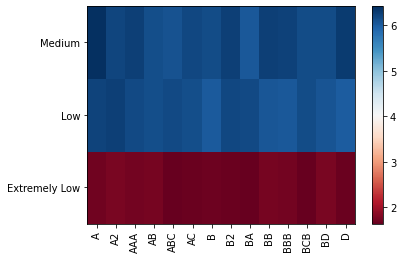

In [113]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### ANOVA

In [114]:
cat_group2=cat_group[['turbine_status', wind]].groupby(['turbine_status'])
cat_group2.head(1)

,turbine_status,windmill_generated_power(kW/h)
0,A,1.710368
1,A2,1.755520
2,AAA,1.730177
3,AB,1.733334
4,ABC,1.638537
5,AC,1.666935
6,B,1.674940
7,B2,1.663634
8,BA,1.639056
9,BB,1.731601


In [116]:
# turbine_status
f_val, p_val = stats.f_oneway(cat_group2.get_group('A')[wind], cat_group2.get_group('A2')[wind],\
                              cat_group2.get_group('AAA')[wind], cat_group2.get_group('AB')[wind],\
                              cat_group2.get_group('ABC')[wind], cat_group2.get_group('AC')[wind],\
                              cat_group2.get_group('B')[wind], cat_group2.get_group('B2')[wind],\
                              cat_group2.get_group('B2')[wind], cat_group2.get_group('BA')[wind],\
                              cat_group2.get_group('BB')[wind], cat_group2.get_group('BBB')[wind],\
                              cat_group2.get_group('BCB')[wind], cat_group2.get_group('BD')[wind],\
                              cat_group2.get_group('D')[wind])  
 
print( "ANOVA for turbine_status: F=", f_val, ", P =", p_val)

ANOVA for turbine_status: F= 0.000961242227005366 , P = 0.9999999999999999


In [129]:
cat_group3=cat_group[['cloud_level', wind]].groupby(['cloud_level'])
cat_group3.head(1)

,cloud_level,windmill_generated_power(kW/h)
0,Extremely Low,1.710368
14,Low,6.242574
28,Medium,6.417629


In [130]:
# cloud_level
f_val, p_val = stats.f_oneway(cat_group3.get_group('Extremely Low')[wind], cat_group3.get_group('Low')[wind],\
                              cat_group3.get_group('Medium')[wind])  
 
print( "ANOVA for cloud_level: F=", f_val, ", P =", p_val)

ANOVA for cloud_level: F= 17131.83579977556 , P = 3.8624680348850876e-58


### So important variables we derived:
#### Numerical:
- wind_speed(m/s)
- haft_temperature(°C)
- blades_angle(°)
- gearbox_temperature(°C)
- engine_temperature(°C)
- motor_torque(N-m)
- generator_temperature(°C)
- area_temperature(°C)
- wind_direction(°)
- resistance(ohm)
- rotor_torque(N-m)
- blade_breadth(m)

#### Categorical
- cloud_level